# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: 

Import the necessary libraries and create your dataframe(s).

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import datetime as dt
import time




my_df = pd.read_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/netflix_titles.csv')

print(my_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [46]:
#finding null value percentage in each column
for col in my_df.columns:
    pct_missing = np.mean(my_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

#replacing null values with unknown for the columns with considerable null percent
my_df['director'].fillna('unknown',inplace=True)
my_df['cast'].fillna('unknown',inplace=True)
my_df['country'].fillna('unknown',inplace=True)


my_df.isnull().sum()
#dropping the remaing null values as their null percentage is very small
my_df.drop(my_df[my_df['rating'].isna()].index,axis=0,inplace=True)
my_df.drop(my_df[my_df['duration'].isna()].index,axis=0,inplace=True)
my_df.drop(my_df[my_df['date_added'].isna()].index,axis=0,inplace=True)

my_df.isnull().sum()

show_id - 0%
type - 0%
title - 0%
director - 0%
cast - 0%
country - 0%
date_added - 0%
release_year - 0%
rating - 0%
duration - 0%
listed_in - 0%
date_added_date - 0%


show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
date_added_date    0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8789 non-null   object        
 1   type             8789 non-null   object        
 2   title            8789 non-null   object        
 3   director         8789 non-null   object        
 4   cast             8789 non-null   object        
 5   country          8789 non-null   object        
 6   date_added       8789 non-null   object        
 7   release_year     8789 non-null   int64         
 8   rating           8789 non-null   object        
 9   duration         8789 non-null   object        
 10  listed_in        8789 non-null   object        
 11  date_added_date  8789 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.6+ KB


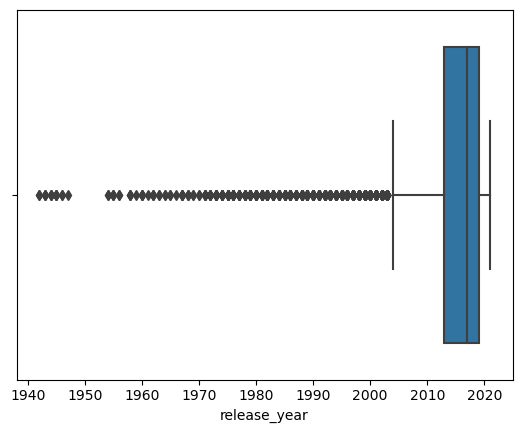

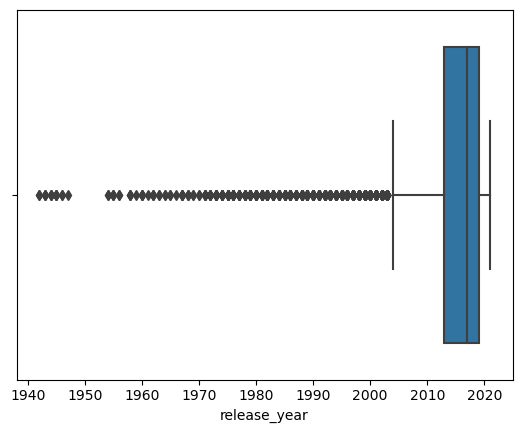

In [47]:
my_df.info()

#the only integer column is release year
#release year statistics 
my_df['release_year'].describe()

# checking for zero values are present 
(my_df['release_year'] == 0).value_counts()
#there are no zero values


# Creating a box plot to identify outliers
sns.boxplot(x=my_df['release_year'])
plt.show()

#detecting the outliers
#from the box plot I can see that there is one value outside the normal range 
reasonable_range = (1940, 2023)  # Example range
my_df = my_df[(my_df['release_year'] >= reasonable_range[0]) & (my_df['release_year'] <= reasonable_range[1])]


#After handling outliers, re-visualize the release_year column to ensure that outliers have been addressed
sns.boxplot(x=my_df['release_year'])
plt.show()

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [51]:
#checking for duplicate rows
my_df.duplicated().sum()

#There are no duplicates in tha dataset

# Droping irrelevant columns
# I am not using the description column any where in my furhter analysis so dropping it
 
my_df = my_df.drop(columns=['description'])

# checking duplicate records in show_id column
sum(my_df.duplicated(subset='show_id',keep=False)) 
# checking duplicate records in title column
sum(my_df.duplicated(subset='title',keep=False))
# there are no duplicate titles or show_id's
#my_df.info()



0

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [53]:
#the show id is starting with s, removing that with replace
my_df['show_id'] = my_df['show_id'].str.replace('s','')
my_df.head()

my_df['date_added']
my_df['date_added'].value_counts()
my_df['date_added'].unique()

# the date_added column is converted to datetime data type for further analysis using date functions
my_df['date_added_date'] = pd.to_datetime(my_df['date_added'])

# check if there are any added_dates that come before release_year
sum(my_df['date_added_date'].dt.year < my_df['release_year'])

my_df.loc[(my_df['date_added_date'].dt.year < my_df['release_year']),['date_added_date','release_year']]


#this data is inconsistent as the date added cannot be before release year


,date_added_date,release_year


In [42]:
# release_year values are replaced with year values from their respective date_added values
my_df.loc[(my_df['date_added_date'].dt.year < my_df['release_year']),'release_year'] = my_df['date_added_date'].dt.year


# some of the records above are checked and it is confirmed that they have been accurately replaced
my_df.iloc[[1551,1696,2920,3168]]


# checking if there is any addition to Netflix before 1997
sum(my_df['date_added_date'].dt.year < 1997)
#there is None

my_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,date_added_date
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021-09-25
1,2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24
3,4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",2021-09-24
4,5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24


In [45]:
# storing the cleaned data into a new csv file
my_df.to_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/netflix_titles_cleaned.csv', index=False)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? Yes
2. Did the process of cleaning your data give you new insights into your dataset? Yes, there are new findings in the process of data cleaning
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? nothing